## Introduction

Name: Stefan van Brummelen
Student ID: 1701792
University name: HU University of Applied Sciences Utrecht

Flight prices are a major factor in the travel industry and can significantly impact travellers' decision-making process. The cost of a flight ticket can vary greatly depending on internal and external factors, including route, time of year, and demand. Airlines use dynamic pricing strategies to adjust prices based on these and other factors to maximize revenue (Abdella et al., 2021). Understanding the factors that affect flight prices and the strategies used by airlines can help consumers make more informed travel decisions.

This research aims to explore various methods for predicting flight prices, including data collection, data mining, statistical modelling and supervised machine learning algorithms. This exercise will examine the strengths and weaknesses of each approach and identify the most effective methods for predicting flight prices by evaluating the results followed by discussion.

Research question:
**"How accurately can linear regression, K-nearest neighbours and Random Forest regressor models predict flight prices using independent flight-related variables?"**


References:
Abdella, J. A., Zaki, N., Shuaib, K., & Khan, F. (2021). Airline ticket price and demand prediction: A survey. Journal of King Saud University - Computer and Information Sciences, 33(4), 375–391. https://doi.org/10.1016/j.jksuci.2019.02.001

## Data set and data cleaning

This code defines a function called "get_data" that takes three arguments: "origin", "destination", and "page". This function makes an API call to a flight data endpoint with the given origin, destination, and page number passed as parameters, along with some default headers and query string. 

The code then uses a for loop to iterate over the "origin" and "destination" variables, and for each iteration, it calls the "get_data" function with the current values of "origin" and "destination" and the page number. It then appends the response data to a results list. This loop makes multiple API calls with different origin and destination values and page numbers and appends the responses to the results list.

In [5]:
# basic data sciency stuff
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, accuracy_score
import math
import requests
import pandas
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.tree import plot_tree

# data formatting libraries
from datetime import datetime, timedelta
from datetime import datetime

In [305]:
# Data collection
'''
def get_data(origin, destination, page):
  headers = {
	    "X-Access-Token": "6a981abb87ceb032a5a553120e4cbe25",
	    "X-RapidAPI-Key": "0bc5970b82msh7f0e3fec7b24d3cp116ef7jsneed2bf03c8c0",
	    "X-RapidAPI-Host": "travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com"
        }
  querystring = {"period_type":"year","origin":origin,"destination":destination,"page":page,"currency":"EUR","show_to_affiliates":"true","one_way":" "}
  url = f"https://travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com/v2/prices/latest" 
  
  response = requests.get(url, headers=headers, params=querystring, timeout=None)
  
  if response.status_code == 200:
    return response.json()
  else:
    print('Error:', response.status_code)

# Multiple API calls (origin, destination) based on the 50 most populair airports (IATA codes) from https://www.world-airport-codes.com/world-top-30-airports.html
origin = ["ATL", "DFW", "DEN", "ORD", "LAX", "CLT", "MCO", "CAN", "CTU", "LAS", "PHX", "MIA", "DEL", "IST", "SZX", "SEA", "MEX", "CKG", "SHA", "PEK", "KMG", "PVG", "IAH", "SVO", "JFK", "XIY", "DXB", "EWR", "HGH", "FLL", "CDG", "HND", "CJU", "AMS", "DME", "PKX", "SAW", "FRA", "MSP", "SFO", "GRU", "MAD", "DTW", "BOS", "GMP", "CUN", "SLC", "AYT", "CSX", "WUH"]
destination = ["ATL", "DFW", "DEN", "ORD", "LAX", "CLT", "MCO", "CAN", "CTU", "LAS", "PHX", "MIA", "DEL", "IST", "SZX", "SEA", "MEX", "CKG", "SHA", "PEK", "KMG", "PVG", "IAH", "SVO", "JFK", "XIY", "DXB", "EWR", "HGH", "FLL", "CDG", "HND", "CJU", "AMS", "DME", "PKX", "SAW", "FRA", "MSP", "SFO", "GRU", "MAD", "DTW", "BOS", "GMP", "CUN", "SLC", "AYT", "CSX", "WUH"]

results = []

# for loop to iterate over the "origin", "destination" variables and page numbers
for origina in origin:
    for destinationa in destination:
      for page in range(1, 20): #set a page limitation to 20 pages of results per request based on routing; origin, destination
        #print(origina, destinationa)
        data = get_data(origina, destinationa, page)
        data = data['data']
          # process the data
        for result in data:
          results.append(result)
          # append results to results dictionary

#save results in df
df = pd.DataFrame(results)
df

'''


'\ndef get_data(origin, destination, page):\n  headers = {\n\t    "X-Access-Token": "6a981abb87ceb032a5a553120e4cbe25",\n\t    "X-RapidAPI-Key": "0bc5970b82msh7f0e3fec7b24d3cp116ef7jsneed2bf03c8c0",\n\t    "X-RapidAPI-Host": "travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com"\n        }\n  querystring = {"period_type":"year","origin":origin,"destination":destination,"page":page,"currency":"EUR","show_to_affiliates":"true","one_way":" "}\n  url = f"https://travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com/v2/prices/latest" \n  \n  response = requests.get(url, headers=headers, params=querystring, timeout=None)\n  \n  if response.status_code == 200:\n    return response.json()\n  else:\n    print(\'Error:\', response.status_code)\n\n# Multiple API calls (origin, destination) based on the 50 most populair airports (IATA codes) from https://www.world-airport-codes.com/world-top-30-airports.html\norigin = ["ATL", "DFW", "DEN", "ORD", "LAX", "CLT", "MCO", "CAN", "CTU", "LAS", 

## Data cleaning and feature engineering
In this section, I am cleaning and transforming the dataframe by performing several operations:

1. Renaming the column 'value' to 'price'
2. Converting 'depart_date', 'return_date' and 'found_at' columns to DateTime format
3. Calculating new columns 'difference_depart_found_date' and 'trip_length_days'
4. Dropping the column 'Unnamed: 0'
5. Changing the datatype of 'show_to_affiliates' and 'actual' columns from boolean to integer
6. Decomposing 'depart_date', 'return_date' and 'found_at' columns into separate year, month, and day columns
7. Dropping several columns including 'trip_class', 'show_to_affiliates', 'gate', 'depart_date', 'return_date', 'found_at', 'actual', 'found_at_year', 'found_at_month'
8. Create a new dataframe "df_subset" that contains only the columns that are left after the above operations.

In [6]:
#save df as csv
df = pd.read_csv('flightdata.csv', sep=';')

# data cleaning and formatting (1/3)
df.columns = df.columns.str.replace('value', 'price')
df['depart_date'] = pd.to_datetime(df['depart_date'], format='%Y-%m-%d')
df['return_date'] = pd.to_datetime(df['return_date'], format='%Y-%m-%d')
df['found_at'] = pd.to_datetime(df['found_at'], format='%Y-%m-%d')

df['difference_depart_found_date'] = df['depart_date'] - df['found_at'] # calculate the difference between the date found (the flight price) and departure date
df['trip_length_days'] = df['return_date'] - df['depart_date'] # calculate the trip length; the days between the departure and return date
df = df.drop('Unnamed: 0', axis=1)
df

,price,trip_class,show_to_affiliates,origin,destination,gate,depart_date,return_date,number_of_changes,found_at,duration,distance,actual,difference_depart_found_date,trip_length_days
0,39,0,True,ATL,DFW,NaN,2023-03-08,2023-03-08,0,2023-01-12 01:57:28,285,1172,True,54 days 22:02:32,0 days
1,43,0,True,ATL,DFW,NaN,2023-02-01,2023-02-01,0,2023-01-13 18:14:17,283,1172,True,18 days 05:45:43,0 days
2,43,0,True,ATL,DFW,NaN,2023-02-01,2023-02-07,0,2023-01-12 00:31:53,283,1172,True,19 days 23:28:07,6 days
3,43,0,True,ATL,DFW,NaN,2023-02-01,2023-02-08,0,2023-01-12 10:27:06,283,1172,True,19 days 13:32:54,7 days
4,43,0,True,ATL,DFW,NaN,2023-03-01,2023-03-08,0,2023-01-12 02:22:06,288,1172,True,47 days 21:37:54,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575820,5891,0,True,WUH,BOS,NaN,2023-01-22,2023-01-27,2,2023-01-13 06:19:57,5860,11863,True,8 days 17:40:03,5 days
575821,5940,0,True,WUH,BOS,NaN,2023-07-12,2023-07-28,2,2023-01-14 11:38:35,6870,11863,True,178 days 12:21:25,16 days
575822,6084,0,True,WUH,BOS,NaN,2023-01-21,2023-01-24,2,2023-01-12 01:54:21,5223,11863,True,8 days 22:05:39,3 days
575823,6325,0,True,WUH,BOS,NaN,2023-01-18,2023-01-27,2,2023-01-13 06:16:53,4760,11863,True,4 days 17:43:07,9 days


In [282]:
# data cleaning and formatting (2/3)
df['difference_depart_found_date'] = df['difference_depart_found_date'].dt.days #format e.g. "54 days 22:02:32" to "54"
df['trip_length_days'] = df['trip_length_days'].dt.days #format e.g. "0 days" to "0"
df['show_to_affiliates'] = df['show_to_affiliates'].astype(int) #from boolean to integer
df['actual'] = df['actual'].astype(int) #from boolean to integer

df['depart_date_year'] = df['depart_date'].dt.year #decompose date format to year
df['depart_date_month'] = df['depart_date'].dt.month #decompose date format to month
df['depart_date_day'] = df['depart_date'].dt.day #decompose date format to day

df['return_date_year'] = df['return_date'].dt.year
df['return_date_month'] = df['return_date'].dt.month
df['return_date_day'] = df['return_date'].dt.day

df['found_at_year'] = df['found_at'].dt.year
df['found_at_month'] = df['found_at'].dt.month
df['found_at_day'] = df['found_at'].dt.day
df

,price,trip_class,show_to_affiliates,origin,destination,gate,depart_date,return_date,number_of_changes,found_at,...,trip_length_days,depart_date_year,depart_date_month,depart_date_day,return_date_year,return_date_month,return_date_day,found_at_year,found_at_month,found_at_day
0,39,0,1,ATL,DFW,NaN,2023-03-08,2023-03-08,0,2023-01-12 01:57:28,...,0,2023,3,8,2023,3,8,2023,1,12
1,43,0,1,ATL,DFW,NaN,2023-02-01,2023-02-01,0,2023-01-13 18:14:17,...,0,2023,2,1,2023,2,1,2023,1,13
2,43,0,1,ATL,DFW,NaN,2023-02-01,2023-02-07,0,2023-01-12 00:31:53,...,6,2023,2,1,2023,2,7,2023,1,12
3,43,0,1,ATL,DFW,NaN,2023-02-01,2023-02-08,0,2023-01-12 10:27:06,...,7,2023,2,1,2023,2,8,2023,1,12
4,43,0,1,ATL,DFW,NaN,2023-03-01,2023-03-08,0,2023-01-12 02:22:06,...,7,2023,3,1,2023,3,8,2023,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575820,5891,0,1,WUH,BOS,NaN,2023-01-22,2023-01-27,2,2023-01-13 06:19:57,...,5,2023,1,22,2023,1,27,2023,1,13
575821,5940,0,1,WUH,BOS,NaN,2023-07-12,2023-07-28,2,2023-01-14 11:38:35,...,16,2023,7,12,2023,7,28,2023,1,14
575822,6084,0,1,WUH,BOS,NaN,2023-01-21,2023-01-24,2,2023-01-12 01:54:21,...,3,2023,1,21,2023,1,24,2023,1,12
575823,6325,0,1,WUH,BOS,NaN,2023-01-18,2023-01-27,2,2023-01-13 06:16:53,...,9,2023,1,18,2023,1,27,2023,1,13


The following columns are dropped from a dataframe. The specific columns and the reason being dropped are:
- Column "trip_class" is only "0"
- Column "show_to_affiliates" is "0" or "1" from which the meaning of it is irrelevant for this prediction
- Column "gate" contains strings and is irrelevant for this prediction
- Column "found_at_year" is in this case always "2023" and so irrelevant for this prediction
- Column "found_at_month" is in this case always "1" and so irrelevant for this prediction
- Columns "depart_date", "return_date", "found_at" are already formatted to "year", "month" and "day" during the previous step, so now "depart_date", "return_date", "found_at" became redundant
- Column "actual" is only "1"

In [321]:
# data cleaning and formatting (3/3)
df_subset = df.drop(columns=["trip_class", "show_to_affiliates", "gate", "depart_date", "return_date", "found_at", "actual", "found_at_year", "found_at_month"]) #drop redundant date columns and columns that are not calculable or irrelevant
df_subset

,price,origin,destination,number_of_changes,duration,distance,difference_depart_found_date,trip_length_days,depart_date_year,depart_date_month,depart_date_day,return_date_year,return_date_month,return_date_day,found_at_day
0,39,ATL,DFW,0,285,1172,54,0,2023,3,8,2023,3,8,12
1,43,ATL,DFW,0,283,1172,18,0,2023,2,1,2023,2,1,13
2,43,ATL,DFW,0,283,1172,19,6,2023,2,1,2023,2,7,12
3,43,ATL,DFW,0,283,1172,19,7,2023,2,1,2023,2,8,12
4,43,ATL,DFW,0,288,1172,47,7,2023,3,1,2023,3,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575820,5891,WUH,BOS,2,5860,11863,8,5,2023,1,22,2023,1,27,13
575821,5940,WUH,BOS,2,6870,11863,178,16,2023,7,12,2023,7,28,14
575822,6084,WUH,BOS,2,5223,11863,8,3,2023,1,21,2023,1,24,12
575823,6325,WUH,BOS,2,4760,11863,4,9,2023,1,18,2023,1,27,13


## Data / descriptive analysis

This section visualises and describes the data to understand the relationships between multiple variables in the data set and analyse the data on errors, inconsistencies, outliers and distribution.

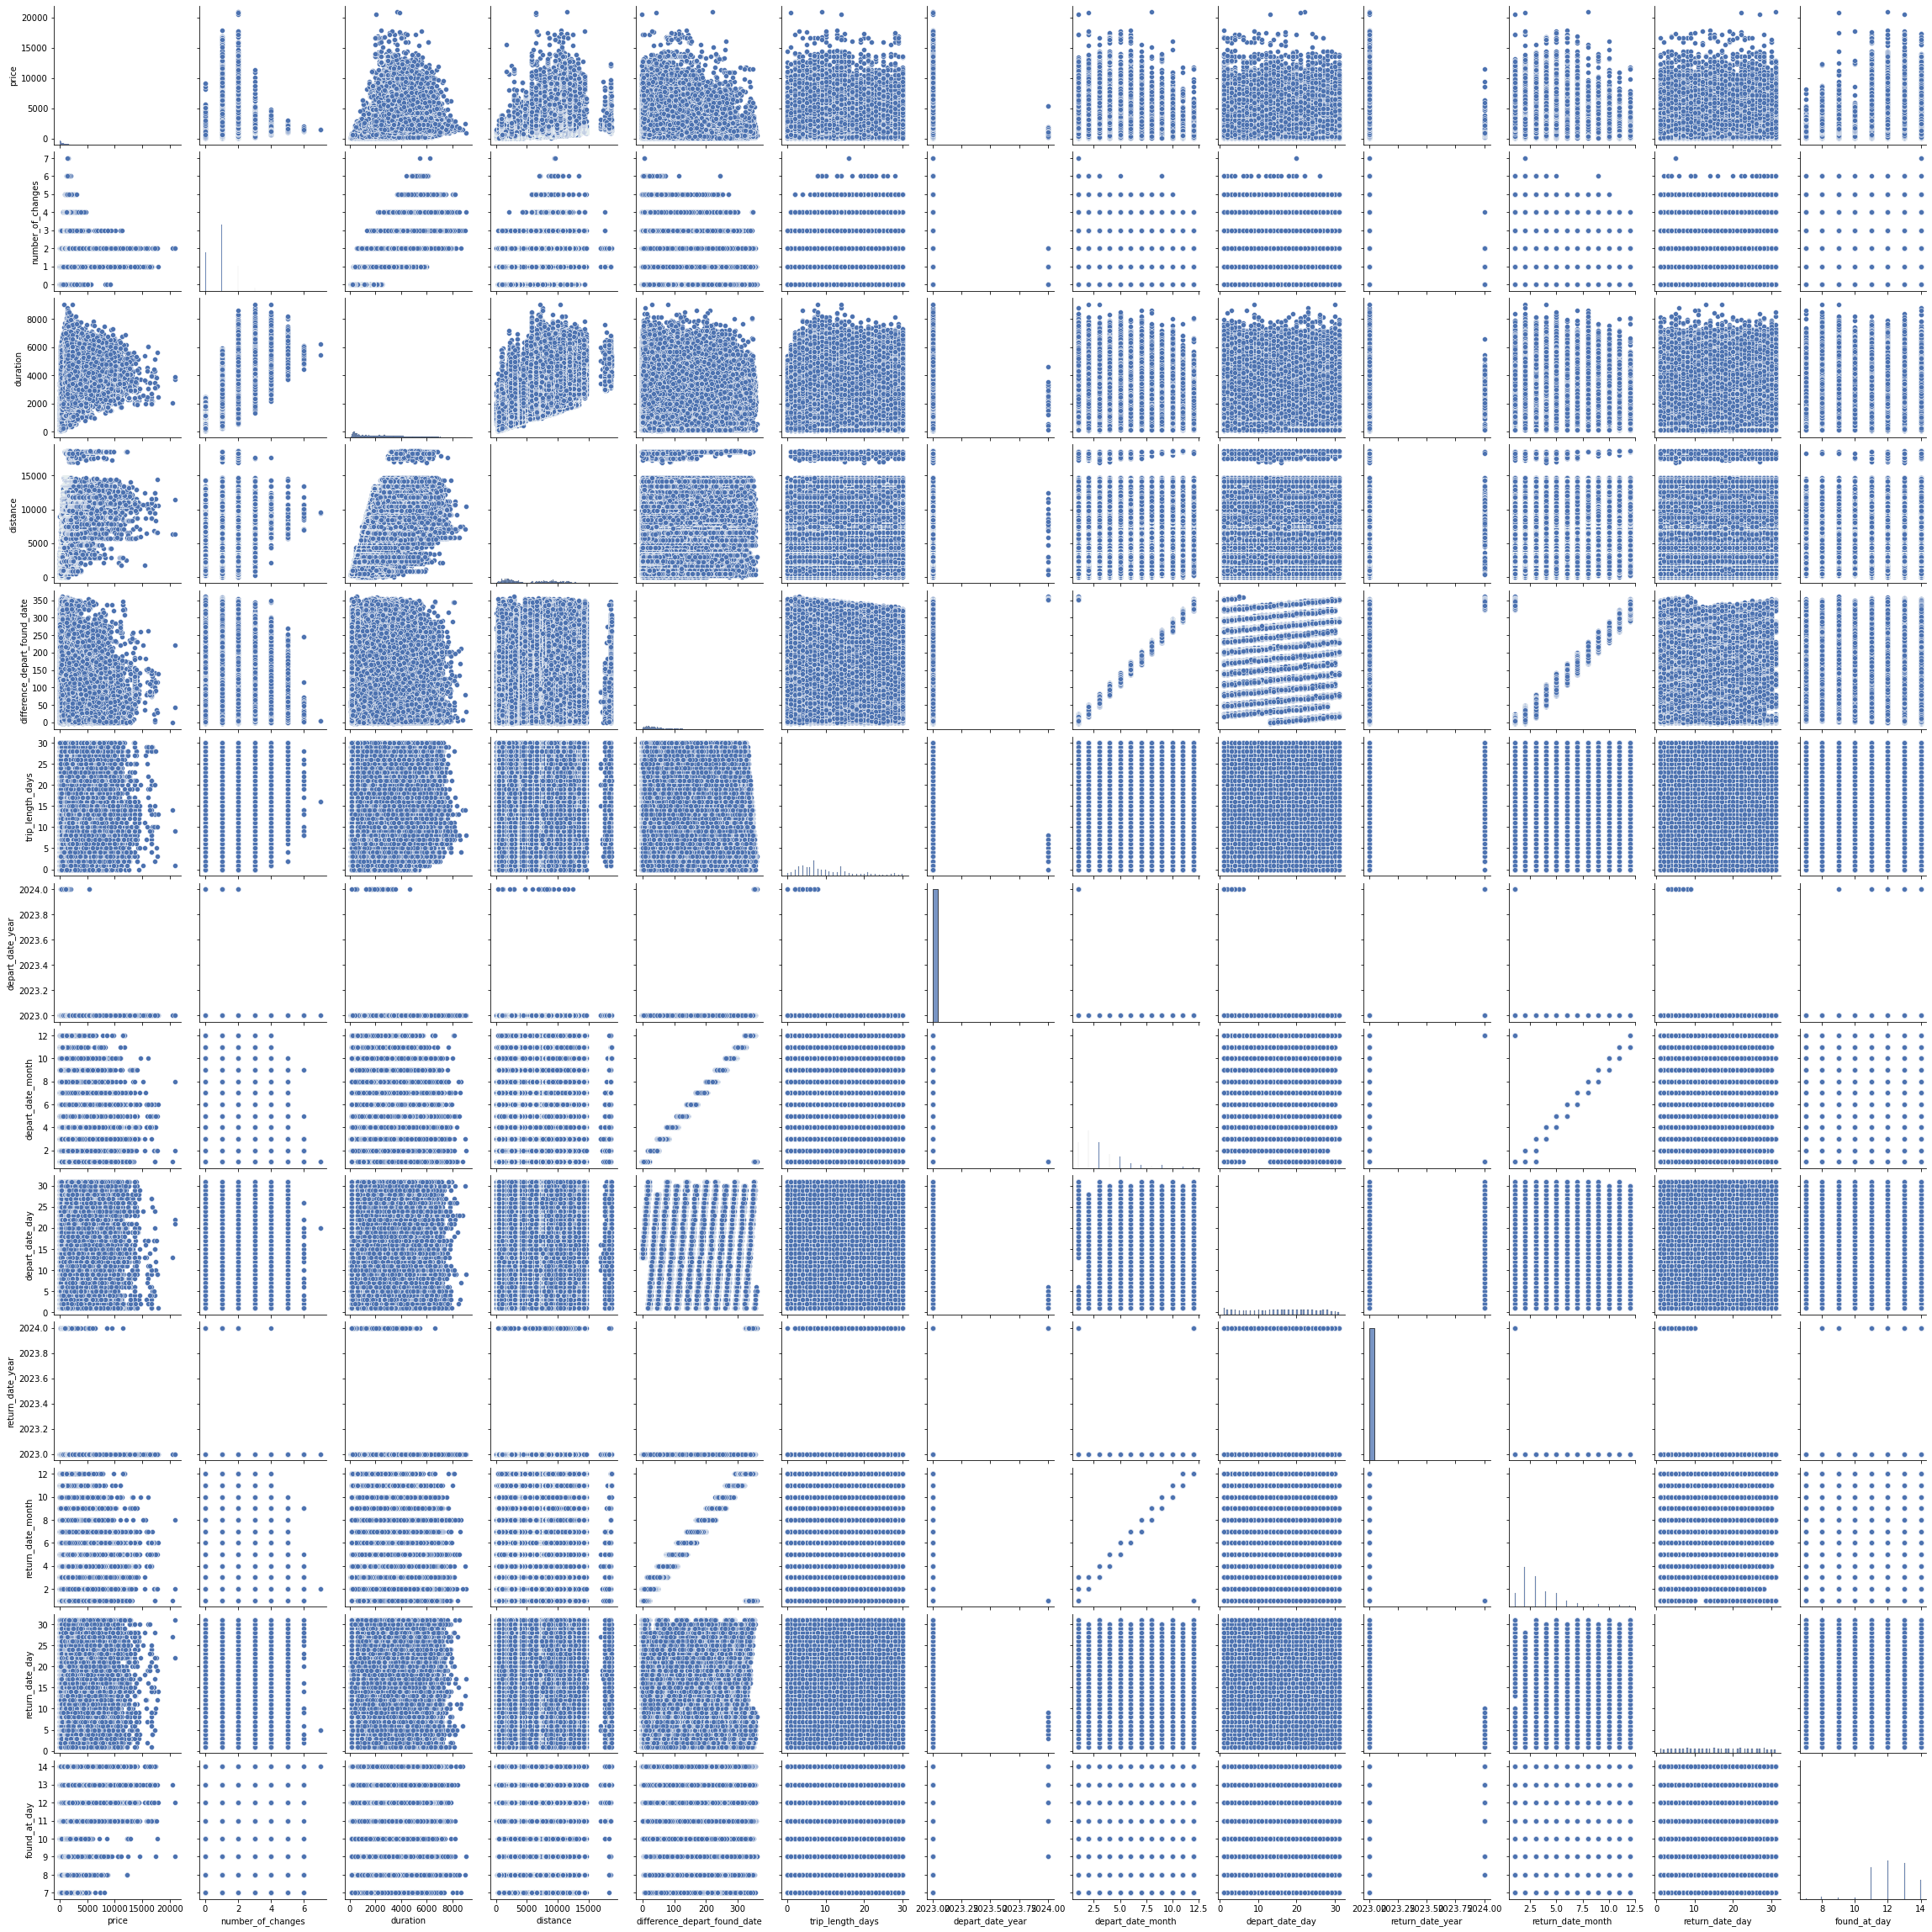

In [284]:
sns.pairplot(df_subset)
sns.set_palette(sns.color_palette("deep"))
plt.show()

##### Interim findings:
- In the matrix of plots a subtle pattern is found between the price and [duration, distance, *difference_depart_found_date]
###### *difference_depart_found_date = the difference in days between the date the price is found and the departure date
- Potential outliers, looking at the distance (further details to be seen in the next step)
- Potential outliers, looking at the duration (further details to be seen in the next step)

##### Intermediate anticipate on the data set due to potential factors to increase the predictability of the flight prices:
- January 2023; due to China's abrupt response concerning the zero-covid policy and its current economic volatility, I eliminated all origin and destination airports in China to strengthen data reliability.

- Cheng, E. (2022b, December 23). China is reopening after zero-Covid. But there's a long road ahead. CNBC. https://www.cnbc.com/2022/12/23/china-presses-on-in-a-long-reopening-path-from-covid.html
Wang, F. M. F. &. (2022, December 27). China ends Covid quarantine for travellers in January. BBC News. https://www.bbc.com/news/world-asia-china-64097497

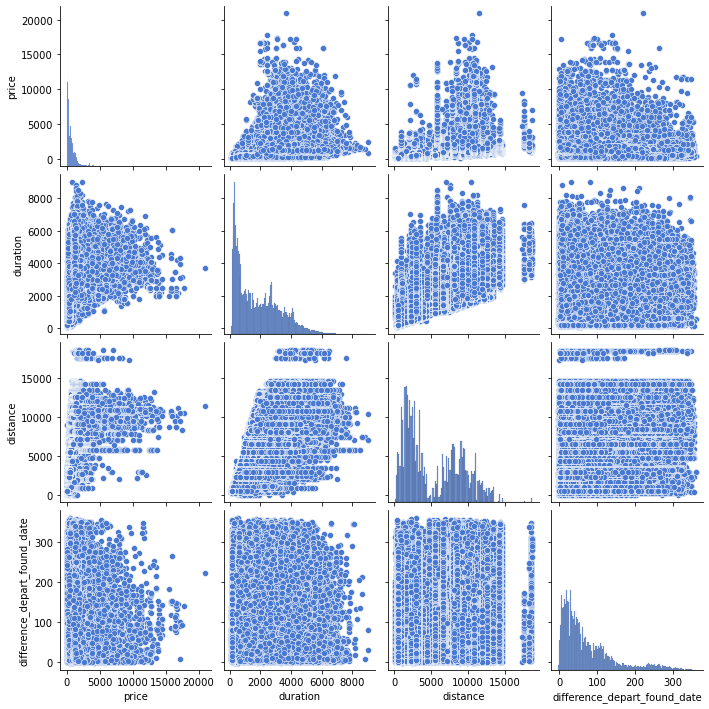

In [322]:
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "CAN"].index) # Guangzhou Baiyun International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "CTU"].index) # Chengdu Shuangliu International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "SZX"].index) # Shenzhen Bao'an International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "CKG"].index) # Chongqing Jiangbei International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "SHA"].index) # Shanghai Hongqiao International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "PEK"].index) # Beijing Capital International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "KMG"].index) # Kunming Changshui International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "PVG"].index) # Shanghai Pudong International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "XIY"].index) # Xi'an Xianyang International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "HGH"].index) # Hangzhou Xiaoshan International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "PKX"].index) # Beijing Daxing International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "CSX"].index) # Changsha Huanghua International Airport
df_subset = df_subset.drop(df_subset[df_subset['origin'] == "WUH"].index) # Wuhan Tianhe International Airport

df_subset = df_subset.drop(df_subset[df_subset['destination'] == "CAN"].index) # Guangzhou Baiyun International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "CTU"].index) # Chengdu Shuangliu International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "SZX"].index) # Shenzhen Bao'an International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "CKG"].index) # Chongqing Jiangbei International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "SHA"].index) # Shanghai Hongqiao International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "PEK"].index) # Beijing Capital International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "KMG"].index) # Kunming Changshui International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "PVG"].index) # Shanghai Pudong International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "XIY"].index) # Xi'an Xianyang International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "HGH"].index) # Hangzhou Xiaoshan International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "PKX"].index) # Beijing Daxing International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "CSX"].index) # Changsha Huanghua International Airport
df_subset = df_subset.drop(df_subset[df_subset['destination'] == "WUH"].index) # Wuhan Tianhe International Airport


df_subset = df_subset #save the df including all variables from the subset; price,origin,destination,number_of_changes,duration,distance,difference_depart_found_date,trip_length_days,depart_date_year,depart_date_month,depart_date_day,return_date_year,return_date_month,return_date_day,found_at_day
df_subset_section = df_subset[["price", "duration", "distance", "difference_depart_found_date"]] #df including the variables who optically seem to have a potential correlation to the flight price; price,duration,distance,difference_depart_found_date

sns.set_palette(sns.color_palette("muted"))
sns.pairplot(df_subset_section)
plt.show()


The pairplot provides a clear visual representation of outliers concerning the distance (15000 or higher) and one flight with an exceptionally high price (more than 20000 EUR).

In [328]:
# Eliminating the outliers
df_subset = df_subset.loc[df_subset['distance'] < 15000] # Eliminate durations from 15000 or higher (outliers)
df_subset = df_subset.loc[df_subset['price'] < 20000] # Eliminate distances from 20000 or higher (outliers)

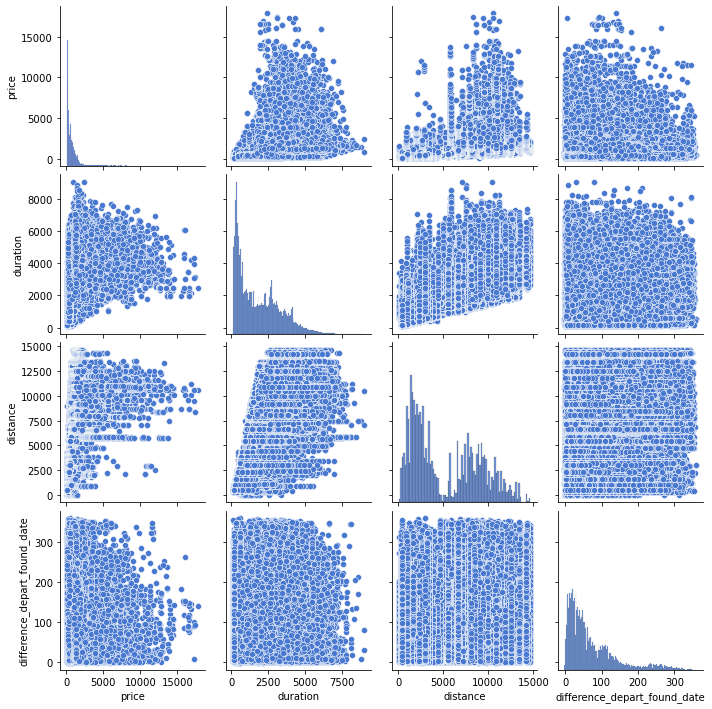

In [354]:
df_subset_section = df_subset[["price", "duration", "distance", "difference_depart_found_date"]] #df including the variables who optically seem to have a potential correlation to the flight price; price,duration,distance,difference_depart_found_date

sns.set_palette(sns.color_palette("muted"))
sns.pairplot(df_subset_section)
plt.show()

The mean of the prices: 751.6837560071743
The median of the prices: 495.0
The standard deviation of the prices: 961.8017623586586


/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


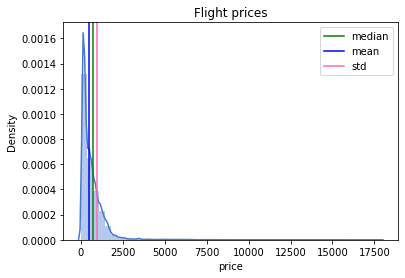

In [330]:
print(f"The mean of the prices: {mean}")
print(f"The median of the prices: {median}")
print(f"The standard deviation of the prices: {std}")

sns.distplot(df_subset["price"], kde=True, norm_hist=False)
plt.title('Flight prices')
plt.axvline(mean, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, 0, 100, color='blue', label='mean') 
plt.axvline(std, 0, 100, color='hotpink', label='std') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

##### The characterisation of the distribution is as follows:
* Normality: the distribution is not normal. The median is 495.0, mean 751.68 and SD 961.80.
* Variation: there is a slight variation. Most values are around between 0 and 2500.
* Modality: there is one peak.
* Skewness: the distribution is skewed to the left.
* Outliers: some values are very far from the trend, but outliers are already eliminated

In [303]:
corr = df_subset.corr()
corr.style.background_gradient(cmap='Blues')


,price,number_of_changes,duration,distance,difference_depart_found_date,trip_length_days,depart_date_year,depart_date_month,depart_date_day,return_date_year,return_date_month,return_date_day,found_at_day
price,1.000000,0.450031,0.575946,0.553870,0.114102,0.206737,0.005739,0.114038,-0.014664,0.023703,0.127490,0.018461,-0.009940
number_of_changes,0.450031,1.000000,0.794221,0.554846,0.060184,0.227874,-0.000694,0.060046,-0.019967,0.007406,0.078143,0.013635,-0.095017
duration,0.575946,0.794221,1.000000,0.791017,0.127741,0.314206,0.001100,0.128000,-0.025934,0.014037,0.152941,0.015994,-0.051843
distance,0.553870,0.554846,0.791017,1.000000,0.196457,0.359635,0.002687,0.197179,-0.030780,0.023596,0.224764,0.016273,-0.001777
difference_depart_found_date,0.114102,0.060184,0.127741,0.196457,1.000000,0.117249,0.026506,0.991255,-0.065244,0.113925,0.976005,0.019656,-0.005465
trip_length_days,0.206737,0.227874,0.314206,0.359635,0.117249,1.000000,-0.005335,0.118974,-0.031108,0.015452,0.213746,0.015746,-0.022584
depart_date_year,0.005739,-0.000694,0.001100,0.002687,0.026506,-0.005335,1.000000,-0.006456,-0.009442,0.222460,-0.007295,-0.007000,0.001706
depart_date_month,0.114038,0.060046,0.128000,0.197179,0.991255,0.118974,-0.006456,1.000000,-0.190034,0.102394,0.970436,0.015071,0.012876
depart_date_day,-0.014664,-0.019967,-0.025934,-0.030780,-0.065244,-0.031108,-0.009442,-0.190034,1.000000,0.014141,-0.075150,0.039730,0.000028
return_date_year,0.023703,0.007406,0.014037,0.023596,0.113925,0.015452,0.222460,0.102394,0.014141,1.000000,-0.032794,-0.040182,0.008799


The correlation matrix is used to show the correlation coefficients between multiple variables. For validation purposes, the complete cleaned dataframe is used to extract the variables which have the highest correlation with the price.

Insights:
- There is sufficient evidence to state that the number_of_changes (0.450031), duration (0.575946) and distance (0.553870) have the highest correlation coefficient to the price.
- These variables; number_of_changes, duration and distance can be used for the Linear Regression to base the predictive model on

## Predictive model(s)

In this section, I am doing a linear regression(1/3), a KNN classification(2/3) and a random forest regression(3/3) on the cleaned subset of the dataframe named df_subset to predict the flight prices. 

1. Creating a Linear Regression model, fitting it on the data and splitting the data into train and test sets (70% for training and 30% for testing). Then, it uses this model to predict the price and adds the predicted values to a new column in the dataframe. A scatter plot is used to plot the actual price against the predicted price using seaborn.
I have calculated the R^2 score, mean squared error, mean absolute error, and explained variance score for the Linear Regression model to evaluate the model.

2. A k-NN classification using the KNeighborsClassifier from sklearn.neighbors with 5 neighbors fits it on the training set and calculates the score on the test set.

3. A random forest regression using the RandomForestRegressor from sklearn.ensemble, splits the data into train and test sets (70% for training and 30% for testing), fits the regressor on the training data, makes predictions on the test data, and plots a tree from the Random Forest regressor model. 
I have the R^2 score, mean squared error, mean absolute error, and explained variance score for the Random Forest regressor model to evaluate the model.



### Linear Regression (model 1/3)

For the Linear Regression, I have used the independent variables of the correlation matrix subset, which have have the highest correlation coefficient to the price, namely:
- number_of_changes (0.450031)
- duration (0.575946)
- distance (0.553870)

In [374]:
x = df_subset[['number_of_changes', 'duration', 'distance']] #independant variables
y = df_subset['price'] # dependant variables


# create a model
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

Visualisations of those independent variables' distribution against the dependent variable 'price' to assess the linear regression(s).

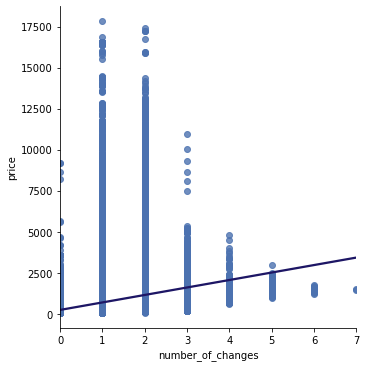

In [375]:
sns.lmplot(x="number_of_changes", y="price", data=df_subset, line_kws={'color': '#1D1665'}) #fit_reg=False #apply other color to line
sns.set_palette(sns.color_palette("deep"))
plt.xlabel("number_of_changes")
plt.ylabel("price")
plt.show()

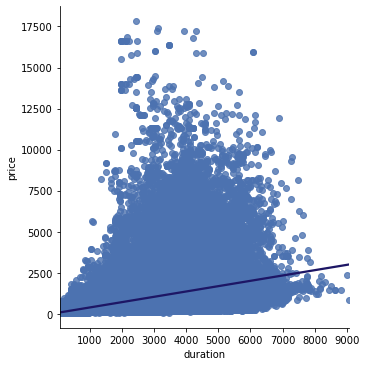

In [351]:
sns.lmplot(x="duration", y="price", data=df_subset, line_kws={'color': '#1D1665'}) #fit_reg=False #apply other color to line
sns.set_palette(sns.color_palette("deep"))
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

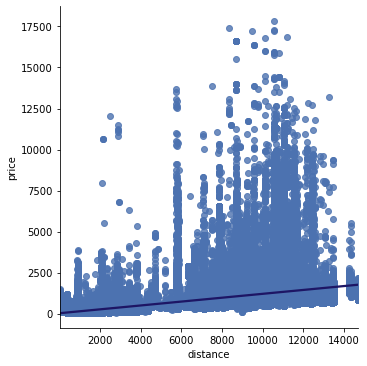

In [352]:
sns.lmplot(x="distance", y="price", data=df_subset, line_kws={'color': '#1D1665'}) #fit_reg=False #apply other color to line
sns.set_palette(sns.color_palette("deep"))
plt.xlabel("distance")
plt.ylabel("price")
plt.show()

Split the data into training and testing sets (70% and 30%, respectively), create a Linear Regression model and fits it on the training data. 
The performance of the Linear Regression model is evaluated by comparing the predicted values with the actual values.

In [358]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #30% for the test partition

lm = LinearRegression()
lm.fit(x_train, y_train)


df_subset['price_prediction'] = lm.predict(x)
df_subset[['price', 'price_prediction']]

,price,price_prediction
0,39,93.039575
1,43,92.658417
2,43,92.658417
3,43,92.658417
4,43,93.611311
...,...,...
575203,1286,1754.969903
575204,1297,1310.540389
575205,1341,1184.567872
575206,1342,1836.537584


A scatterplot of the actual price and predicted price based on the Linear Regression model.

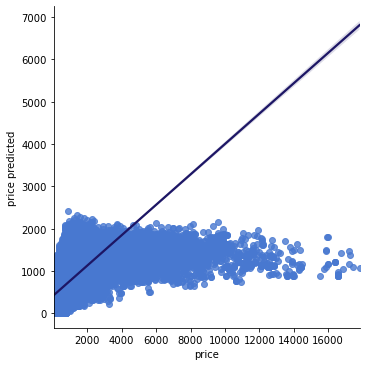

In [356]:
sns.lmplot(x="price", y="price_prediction", data=df_subset, line_kws={'color': '#1D1665'})
sns.set_palette(sns.color_palette("deep"))
plt.xlabel("price")
plt.ylabel("price predicted")
plt.show()

### Evaluation of the Linear Regression
Metrics used to evaluate the performance of a machine learning model:
- The R^2 score
- Mean squared error (MSE)
- Mean absolute error (MAE)
- Explained variance score (EVS)

Excluded from the evaluation:
- Since the accuracy score is a common measure of a classifier's performance, while predicting the price is a Regression issue, this score is not used to evaluate the model.
- The out-of-bag score (oob_score_) is a measure of the accuracy of a random forest classifier, whilst a Random Forest Regressor model is used, making this evaluation measure invalid to use.

In [368]:
# Calculate R^2 score
r2 = r2_score(df_subset['price'], df_subset['price_prediction'])
print("R^2 score:", r2)

# Calculate mean squared error
mse = math.sqrt(mean_squared_error(df_subset['price'], df_subset['price_prediction']))
print("Mean squared error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(df_subset['price'], df_subset['price_prediction'])
print("Mean absolute error:", mae)

# Calculate explained variance score
evs = explained_variance_score(df_subset['price'], df_subset['price_prediction'])
print("Explained variance score:", evs)

R^2 score: 0.35860448784449483
Mean squared error: 641.5988823937121
Mean absolute error: 283.34092926300497
Explained variance score: 0.3586044928426242


#### Evaluation of the model
- **R^2** score: 0.35860448784449483, the model is able to correctly predict **35.86%** of the variation in the target variable based on the input variables.
- **Explained variance score**: 0.3586044928426242, means that **35.86%** of the variance in the dependent variable can be explained by the independent variable(s).
- **Mean squared error**: 641.5988823937121, means that on average, the model's predictions are off by **641.60** euro (squared) from the true values.
- **Mean absolute error**: 283.34092926300497, means that on average, the model's predictions are off by **283.34** euro from the true values.

### K-nearest neighbors (model 2/3)

Creating a k-NN classifier with 5 neighbors(default), fitting the model on the training data, and then evaluating the model's performance on the test data by calculating the score. 

In [373]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(x_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(x_test, y_test) #calculate the fit on the test data

0.19601180898174128

#### Evaluation of the model
A score of 0.19601180898174128 means that the KNN classifier is able to correctly classify **19.60%** of the test instances. 
- This low accuracy value suggests that the model is not performing well on the test data. 
- The knn-score provides sufficient evidence not to continue using this machine learning model for this data set and problem. Underneath a scatterplot of the actual price, and predicted price based on the Linear Regression model.

### Random Forest Regressor (model 3/3)

Creating a random forest regressor model using all independent variables from the dataframe and dependent variable price, split the data into training and testing sets (70% for training and 30% for testing). After that, create the regressor, fit it on the training data, and make a prediction on the test set. Plot a tree from the Random Forest regressor model.

[Text(167.4, 199.32, 'X[2] <= 5769.0\nmse = 639785.666\nsamples = 221958\nvalue = 650.773'),
 Text(83.7, 163.07999999999998, 'X[1] <= 1222.5\nmse = 61673.843\nsamples = 123833\nvalue = 266.613'),
 Text(41.85, 126.83999999999999, 'X[1] <= 413.5\nmse = 18465.605\nsamples = 97369\nvalue = 213.245'),
 Text(20.925, 90.6, 'X[3] <= 54.5\nmse = 7852.625\nsamples = 41221\nvalue = 150.601'),
 Text(10.4625, 54.359999999999985, 'X[2] <= 1175.5\nmse = 6320.778\nsamples = 24711\nvalue = 130.877'),
 Text(5.23125, 18.119999999999976, 'mse = 5002.012\nsamples = 11471\nvalue = 113.66'),
 Text(15.693750000000001, 18.119999999999976, 'mse = 6983.143\nsamples = 13240\nvalue = 145.764'),
 Text(31.387500000000003, 54.359999999999985, 'X[2] <= 1175.5\nmse = 8691.309\nsamples = 16510\nvalue = 180.345'),
 Text(26.15625, 18.119999999999976, 'mse = 5251.026\nsamples = 7892\nvalue = 154.693'),
 Text(36.61875, 18.119999999999976, 'mse = 10686.702\nsamples = 8618\nvalue = 203.826'),
 Text(62.775000000000006, 90.6, '

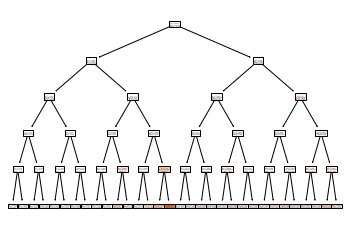

In [244]:
x = df_subset[['number_of_changes', 'duration', 'distance', 'difference_depart_found_date', 'trip_length_days', 'depart_date_year', 'depart_date_month', 'depart_date_day', 'return_date_year', 'return_date_month', 'return_date_month', 'return_date_day', 'found_at_day']] #independant variables
y = df_subset['price'] # dependant variables

x_train_randomforest, x_test_randomforest, y_train_randomforest, y_test_randomforest = train_test_split(x, y, test_size=0.3, random_state=1) #30% for the test partition

# Create the regressor
regressor = RandomForestRegressor()

# Train the regressor on the training data
regressor.fit(x_train_randomforest, y_train_randomforest)

# Make predictions on the test set
y_pred_randomforest = regressor.predict(x_test_randomforest)

# Plot tree
rfc = RandomForestRegressor(random_state=1982, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True) #n_jobs is the amount of processor kernals you want to use, max_depth=5 = does 5 layers down and then stop. n_estimators=100 = build 100 trees. oob_score=True = validation of trees
rfc.fit(x_train_randomforest, y_train_randomforest)
plt.figure()
plot_tree(rfc.estimators_[5], filled=True)

Create an overview of the actual prices and the predicted prices.

In [339]:
predicted_price_randomforest = pd.DataFrame({"price": y_test_randomforest, "price predicted": y_pred_randomforest})
predicted_price_randomforest

,price,price predicted
221679,318,327.250
414393,4920,3565.350
68425,200,197.200
546223,409,400.610
511133,134,135.520
...,...,...
22213,80,74.190
571603,71,71.640
323453,250,249.390
43640,127,153.275


A scatterplot of the actual price and the price predicted based on the Random Forest Regressor model.

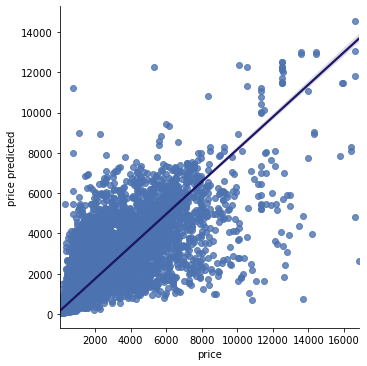

In [257]:
sns.lmplot(x="price", y="price predicted", data=predicted_price_randomforest, line_kws={'color': '#1D1665'})
sns.set_palette(sns.color_palette("deep"))
plt.xlabel("price")
plt.ylabel("price predicted")
plt.show()

### Evaluation of the Random Forest Regressor
Metrics used to evaluate the performance of a machine learning model:
- The R^2 score
- Mean squared error (MSE)
- Mean absolute error (MAE)
- Explained variance score (EVS)

Excluded from the evaluation:
- Since the accuracy score is a common measure of a classifier's performance, while predicting the price is a Regression issue, this score is not used to evaluate the model.
- The out-of-bag score (oob_score_) is a measure of the accuracy of a random forest classifier, whilst a Random Forest Regressor model is used, making this evaluation measure invalid to use.

In [371]:
# Calculate R^2 score
r2 = r2_score(y_test_randomforest, y_pred_randomforest)
print("R^2 score:", r2)

# Calculate mean squared error
mse = math.sqrt(mean_squared_error(y_test_randomforest, y_pred_randomforest))
print("Mean squared error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test_randomforest, y_pred_randomforest)
print("Mean absolute error:", mae)

# Calculate explained variance score
evs = explained_variance_score(y_test_randomforest, y_pred_randomforest)
print("Explained variance score:", evs)

R^2 score: 0.7940975628776935
Mean squared error: 364.2884985070691
Mean absolute error: 105.01993247421997
Explained variance score: 0.7941616382907576


#### Evaluation of the model
- **R^2** score: 0.7940975628776935, the model is able to correctly predict **79.41%** of the variation in the target variable based on the input variables.
- **Explained variance score** : 0.7941616382907576, means that **79.42%** of the variance in the dependent variable can be explained by the independent variable(s).
- **Mean squared error**: 364.2884985070691, means that on average, the model's predictions are off by **364.29** euro (squared) from the true values.
- **Mean absolute error**: 105.01993247421997, means that on average, the model's predictions are off by **105.02** euro from the true values.


## Conclusion

In conclusion, based on the evaluation of the linear regression, k-nearest neighbors, and random forest regressor models, it is clear that the random forest regressor model performed the best on this dataset. The R^2 score and explained variance score of 0.79 suggest that the model was able to correctly predict 79.41% of the variation in the target variable based on the input variables. Additionally, the mean squared error and mean absolute error values of 364.29 and 105.02, respectively, indicate that the model's predictions were relatively close to the true values on average. On the other hand, the linear regression model had a lower R^2 score and explained variance score of 0.36, and higher mean squared error and mean absolute error values of 641.6 and 283.34, respectively, which suggests that the model's predictions were not close to the true values. The K-nearest neighbors model had a score of 0.196, which is a low accuracy and suggests that the model did not perform well on the test data. Therefore, it is recommended to use the random forest regressor model for this dataset and problem, and it may be worth exploring other models, techniques or data variables to improve the performance.

#### Discussion

Speaking about the independent data variables used to predict flight prices, one of the influential factors is the demand for flights. Whose is influenced by various factors such as the number of seats available, the season, the day of the week, the time of the year, the origin and destination of the flight, and the fare class (Abdella et al., 2021). The accuracy of a model is highly dependent on the quality of the data, a large amount of *historical flight data* is needed, and it is essential to use a combination of different models and techniques to improve the accuracy of the predictions. It is also important to update the models regularly with new data and retrain them to improve their performance.

References:
Abdella, J. A., Zaki, N., Shuaib, K., & Khan, F. (2021). Airline ticket price and demand prediction: A survey. Journal of King Saud University - Computer and Information Sciences, 33(4), 375–391. https://doi.org/10.1016/j.jksuci.2019.02.001